In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from datetime import date
from datetime import date
import time
import glob
import os

## Download do arquivo de dados no formato .xlsx para a pasta downloads

In [6]:
current_year = date.today().year

def baixar_relatorio_anual(ano):

    url = 'https://www.sigeo.fazenda.sp.gov.br/analytics/saw.dll?Dashboard&PortalPath=/shared/SIGEO/_portal/Consulta%20Temporal&Page=Valores%20Arrecadados&NQuser=transparencia&NQPassword=sigeo001'
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(5)

    drop_year = '/html/body/div[8]/table[2]/tbody/tr[1]/td[2]/div/table[1]/tbody/tr/td[2]/div[1]/div[2]/table[1]/tbody/tr/td[1]/div/table/tbody/tr[5]/td/div/table/tbody/tr/td/div/table/tbody/tr/td/div/div/div/table/tbody/tr/td/div/form/div/table/tbody/tr[2]/td/table/tbody/tr/td/table/tbody/tr[1]/td/table/tbody/tr[2]/td/span/span/div/div[1]/input'
    driver.find_element(By.XPATH, drop_year).click()
    time.sleep(2)
    div = current_year - ano + 1
    select_ano = f'/html/body/div[10]/div/div[2]/div[{div}]'
    driver.find_element(By.XPATH, select_ano).click()
    time.sleep(2)
    apply_b = '/html/body/div[8]/table[2]/tbody/tr[1]/td[2]/div/table[1]/tbody/tr/td[2]/div[1]/div[2]/table[1]/tbody/tr/td[1]/div/table/tbody/tr[5]/td/div/table/tbody/tr/td/div/table/tbody/tr/td/div/div/div/table/tbody/tr/td/div/form/div/table/tbody/tr[3]/td/input'
    driver.find_element(By.XPATH, apply_b).click()
    time.sleep(8)

    export_b = '/html/body/div[8]/table[2]/tbody/tr[1]/td[2]/div/table[1]/tbody/tr/td[2]/div[1]/div[2]/table[1]/tbody/tr/td[3]/div/table/tbody/tr[1]/td/div/div[3]/table/tbody/tr/td/div/table/tbody/tr/td/div/table/tbody/tr/td/div/div/div/table/tbody/tr/td/a'
    driver.find_element(By.XPATH, export_b).click()
    excel_b = '/html/body/div[11]/table/tbody/tr[1]/td[1]/a[2]/table/tbody/tr'
          
    driver.find_element(By.XPATH, excel_b).click()
    time.sleep(5)
    driver.close()

baixar_relatorio_anual(current_year)

## Obtendo o foi último aquivo .xlsx baixado

In [4]:
path_downloads = "C:/Users/ander/Downloads/*.xlsx"
list_of_files = glob.glob(path_downloads)
latest_file = max(list_of_files, key=os.path.getctime)

In [5]:
latest_file

'C:/Users/ander/Downloads\\Valores_Natureza_Receita_2019 (15).xlsx'

## Importando o arquivo para o pandas

In [6]:
path = latest_file
df = pd.read_excel(path)
ano = df.loc[6][0]

In [7]:
ano

'2022'

In [8]:
#df[5:10]

### Selecionando as colunas desejadas

In [9]:
df_util = df.loc[(df['Unnamed: 1'] == 'JANEIRO') |
       (df['Série Histórica da Execução Orçamentária e Financeira - Receita'] == df.loc[6][0]) |
       (df['Série Histórica da Execução Orçamentária e Financeira - Receita'] == '111 - IMPOSTOS') | 
       (df['Série Histórica da Execução Orçamentária e Financeira - Receita'] == '112 - TAXAS') |
       (df['Série Histórica da Execução Orçamentária e Financeira - Receita'] == '12 - CONTRIBUICOES')
       ]

In [10]:
df_util

,Série Histórica da Execução Orçamentária e Financeira - Receita,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
5,NaN,JANEIRO,FEVEREIRO,MARCO,ABRIL,MAIO,JUNHO,NaN
6,2022,32709126616.959999,25131373485.029999,29628014544.59,28202923980.439999,27428027422.220001,2132049465.66,145231515514.899994
9,111 - IMPOSTOS,25683187407.779999,18153436498.580002,21536190775.27,20089267550.529999,20831415711.810001,1072799380.91,107366297324.880005
117,112 - TAXAS,968080728.68,725409866.57,786239607.68,656241197.35,836022904.9,39292906.03,4011287211.21
173,12 - CONTRIBUICOES,696479047.33,668746860.82,760081566.29,891431600.76,574649979.24,3618174.66,3595007229.1


### Fazendo ajustes na formatação do dataframe

In [11]:
df_util.reset_index(drop=True, inplace=True)
df_util = df_util.drop(df_util.columns[-1], axis=1)
df_util.columns = df_util.iloc[0]
df_util = df_util.drop(df.index[0])
df_util = df_util.rename(columns = {df_util.columns[0]: df_util.iloc[0][0]})
df_util.loc[1][0] = 'Total'
df_util = df_util.add_suffix('/'+ano[0:4])
df_util.set_index(df_util.columns[0], inplace=True)

In [12]:
df_util

,JANEIRO/2022,FEVEREIRO/2022,MARCO/2022,ABRIL/2022,MAIO/2022,JUNHO/2022
2022/2022,,,,,,
Total,32709126616.959999,25131373485.029999,29628014544.59,28202923980.439999,27428027422.220001,2132049465.66
111 - IMPOSTOS,25683187407.779999,18153436498.580002,21536190775.27,20089267550.529999,20831415711.810001,1072799380.91
112 - TAXAS,968080728.68,725409866.57,786239607.68,656241197.35,836022904.9,39292906.03
12 - CONTRIBUICOES,696479047.33,668746860.82,760081566.29,891431600.76,574649979.24,3618174.66


In [13]:
df_util.index.name = None

In [14]:
df_util

,JANEIRO/2022,FEVEREIRO/2022,MARCO/2022,ABRIL/2022,MAIO/2022,JUNHO/2022
Total,32709126616.959999,25131373485.029999,29628014544.59,28202923980.439999,27428027422.220001,2132049465.66
111 - IMPOSTOS,25683187407.779999,18153436498.580002,21536190775.27,20089267550.529999,20831415711.810001,1072799380.91
112 - TAXAS,968080728.68,725409866.57,786239607.68,656241197.35,836022904.9,39292906.03
12 - CONTRIBUICOES,696479047.33,668746860.82,760081566.29,891431600.76,574649979.24,3618174.66


### Carregando o arquivo com os hitórico

In [15]:
df_old = pd.read_csv('arrecadacao_sp.csv', index_col=0)

In [16]:
df_old

,JANEIRO/1996,FEVEREIRO/1996,MARCO/1996,ABRIL/1996,MAIO/1996,JUNHO/1996,JULHO/1996,AGOSTO/1996,SETEMBRO/1996,OUTUBRO/1996,...,SETEMBRO/2021,OUTUBRO/2021,NOVEMBRO/2021,DEZEMBRO/2021,JANEIRO/2022,FEVEREIRO/2022,MARCO/2022,ABRIL/2022,MAIO/2022,JUNHO/2022
Total,2.676783e+09,2.097057e+09,2.620139e+09,2.146277e+09,2.300029e+09,3.149323e+09,2.387304e+09,2.364166e+09,2.525978e+09,5.409976e+09,...,2.448522e+10,2.491945e+10,2.600893e+10,3.689361e+10,3.270913e+10,2.513137e+10,2.962801e+10,2.810895e+10,1.020417e+10,1.527536e+09
111 - IMPOSTOS,2.398401e+09,1.886430e+09,1.750849e+09,1.800437e+09,1.832943e+09,1.809743e+09,1.867412e+09,1.862525e+09,1.867724e+09,1.893930e+09,...,1.811229e+10,1.826821e+10,1.916221e+10,2.174962e+10,2.568319e+10,1.815344e+10,2.153619e+10,2.008927e+10,6.961760e+09,8.409368e+08
112 - TAXAS,4.899111e+07,4.847498e+07,5.974057e+07,5.757628e+07,6.542510e+07,5.578818e+07,7.082892e+07,6.740560e+07,6.889266e+07,7.156029e+07,...,7.578547e+08,7.108079e+08,7.794816e+08,7.877269e+08,9.680807e+08,7.254099e+08,7.862396e+08,6.562412e+08,3.387373e+08,3.486471e+07
12 - CONTRIBUICOES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.017842e+08,1.218597e+07,2.070729e+07,...,6.895829e+08,6.948514e+08,7.388965e+08,9.855104e+08,6.964790e+08,6.687469e+08,7.600816e+08,8.458953e+08,1.229401e+07,3.509408e+06


In [17]:
list(df_old.columns[-5::])

['FEVEREIRO/2022', 'MARCO/2022', 'ABRIL/2022', 'MAIO/2022', 'JUNHO/2022']

In [18]:
#df_merge = pd.concat([df_old, df_util], axis=1)

### Alterando os dados no dataframe armazenado para incluir a alteração diária nos valores

In [19]:
df_merge = pd.concat([df_old, df_util[df_util.columns.difference(df_old.columns)]], axis=1)

In [20]:
df_merge

,JANEIRO/1996,FEVEREIRO/1996,MARCO/1996,ABRIL/1996,MAIO/1996,JUNHO/1996,JULHO/1996,AGOSTO/1996,SETEMBRO/1996,OUTUBRO/1996,...,SETEMBRO/2021,OUTUBRO/2021,NOVEMBRO/2021,DEZEMBRO/2021,JANEIRO/2022,FEVEREIRO/2022,MARCO/2022,ABRIL/2022,MAIO/2022,JUNHO/2022
Total,2.676783e+09,2.097057e+09,2.620139e+09,2.146277e+09,2.300029e+09,3.149323e+09,2.387304e+09,2.364166e+09,2.525978e+09,5.409976e+09,...,2.448522e+10,2.491945e+10,2.600893e+10,3.689361e+10,3.270913e+10,2.513137e+10,2.962801e+10,2.810895e+10,1.020417e+10,1.527536e+09
111 - IMPOSTOS,2.398401e+09,1.886430e+09,1.750849e+09,1.800437e+09,1.832943e+09,1.809743e+09,1.867412e+09,1.862525e+09,1.867724e+09,1.893930e+09,...,1.811229e+10,1.826821e+10,1.916221e+10,2.174962e+10,2.568319e+10,1.815344e+10,2.153619e+10,2.008927e+10,6.961760e+09,8.409368e+08
112 - TAXAS,4.899111e+07,4.847498e+07,5.974057e+07,5.757628e+07,6.542510e+07,5.578818e+07,7.082892e+07,6.740560e+07,6.889266e+07,7.156029e+07,...,7.578547e+08,7.108079e+08,7.794816e+08,7.877269e+08,9.680807e+08,7.254099e+08,7.862396e+08,6.562412e+08,3.387373e+08,3.486471e+07
12 - CONTRIBUICOES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.017842e+08,1.218597e+07,2.070729e+07,...,6.895829e+08,6.948514e+08,7.388965e+08,9.855104e+08,6.964790e+08,6.687469e+08,7.600816e+08,8.458953e+08,1.229401e+07,3.509408e+06


In [21]:
# df_merge = df_old.join(df_util[df_util.columns.difference(df_old.columns)]) #testar isso 

In [22]:
len(df_merge.columns)

318

In [23]:
list(df_merge.columns[-15::])

['ABRIL/2021',
 'MAIO/2021',
 'JUNHO/2021',
 'JULHO/2021',
 'AGOSTO/2021',
 'SETEMBRO/2021',
 'OUTUBRO/2021',
 'NOVEMBRO/2021',
 'DEZEMBRO/2021',
 'JANEIRO/2022',
 'FEVEREIRO/2022',
 'MARCO/2022',
 'ABRIL/2022',
 'MAIO/2022',
 'JUNHO/2022']

In [24]:
df_merge.to_csv('arrecadacao_sp.csv')

In [25]:
# df_old.to_csv('arrecadacao_sp.csv')

In [26]:
df_merge

,JANEIRO/1996,FEVEREIRO/1996,MARCO/1996,ABRIL/1996,MAIO/1996,JUNHO/1996,JULHO/1996,AGOSTO/1996,SETEMBRO/1996,OUTUBRO/1996,...,SETEMBRO/2021,OUTUBRO/2021,NOVEMBRO/2021,DEZEMBRO/2021,JANEIRO/2022,FEVEREIRO/2022,MARCO/2022,ABRIL/2022,MAIO/2022,JUNHO/2022
Total,2.676783e+09,2.097057e+09,2.620139e+09,2.146277e+09,2.300029e+09,3.149323e+09,2.387304e+09,2.364166e+09,2.525978e+09,5.409976e+09,...,2.448522e+10,2.491945e+10,2.600893e+10,3.689361e+10,3.270913e+10,2.513137e+10,2.962801e+10,2.810895e+10,1.020417e+10,1.527536e+09
111 - IMPOSTOS,2.398401e+09,1.886430e+09,1.750849e+09,1.800437e+09,1.832943e+09,1.809743e+09,1.867412e+09,1.862525e+09,1.867724e+09,1.893930e+09,...,1.811229e+10,1.826821e+10,1.916221e+10,2.174962e+10,2.568319e+10,1.815344e+10,2.153619e+10,2.008927e+10,6.961760e+09,8.409368e+08
112 - TAXAS,4.899111e+07,4.847498e+07,5.974057e+07,5.757628e+07,6.542510e+07,5.578818e+07,7.082892e+07,6.740560e+07,6.889266e+07,7.156029e+07,...,7.578547e+08,7.108079e+08,7.794816e+08,7.877269e+08,9.680807e+08,7.254099e+08,7.862396e+08,6.562412e+08,3.387373e+08,3.486471e+07
12 - CONTRIBUICOES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.017842e+08,1.218597e+07,2.070729e+07,...,6.895829e+08,6.948514e+08,7.388965e+08,9.855104e+08,6.964790e+08,6.687469e+08,7.600816e+08,8.458953e+08,1.229401e+07,3.509408e+06


## Análise dos dados

In [27]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [28]:
df_plot = df_merge.transpose()

In [29]:
df_plot.head(5)

,Total,111 - IMPOSTOS,112 - TAXAS,12 - CONTRIBUICOES
JANEIRO/1996,2.676783e+09,2.398401e+09,48991106.21,NaN
FEVEREIRO/1996,2.097057e+09,1.886430e+09,48474984.24,NaN
MARCO/1996,2.620139e+09,1.750849e+09,59740572.45,NaN
ABRIL/1996,2.146277e+09,1.800437e+09,57576276.74,NaN
MAIO/1996,2.300029e+09,1.832943e+09,65425099.98,NaN


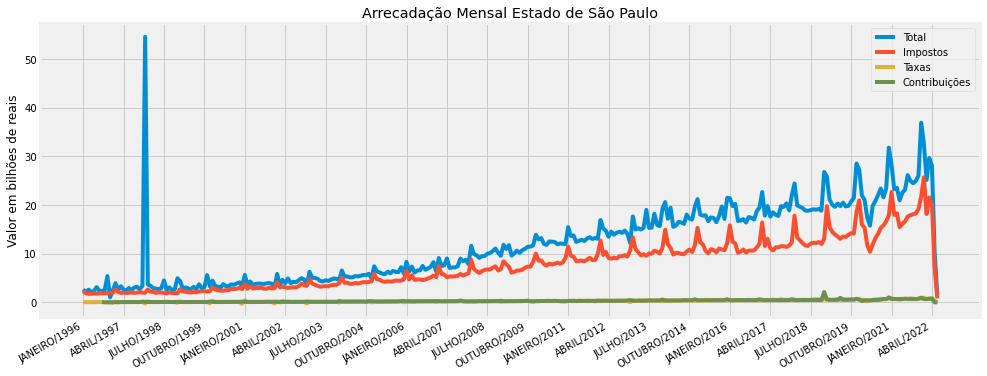

In [34]:
plt.figure(figsize=(15, 6))
plt.plot(df_plot.index, df_plot['Total']/1e9, label='Total')
plt.plot(df_plot.index, df_plot['111 - IMPOSTOS']/1e9, label='Impostos')
plt.plot(df_plot.index, df_plot['112 - TAXAS']/1e9, label='Taxas')
plt.plot(df_plot.index, df_plot['12 - CONTRIBUICOES']/1e9, label='Contribuições')
plt.xticks(df_plot.index[0::15])
plt.gcf().autofmt_xdate()
plt.ylabel("Valor em bilhões de reais")
plt.title("Arrecadação Mensal Estado de São Paulo")
plt.legend(prop={'size': 10})

**Observações**: 

1 - O valor arredado em impostos é o principal determinante na arrecadação do estado.

2 - A arredação possui um comportamento periódico


In [35]:
df_plot['SMA-12'] = df_plot['111 - IMPOSTOS'].rolling(12).mean()

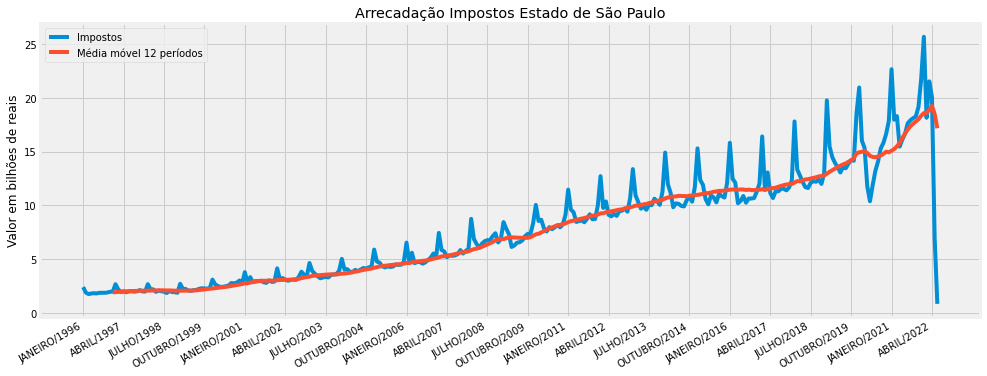

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(df_plot.index, df_plot['111 - IMPOSTOS']/1e9, label='Impostos')
plt.plot(df_plot.index, df_plot['SMA-12']/1e9, label='Média móvel 12 períodos')
plt.xticks(df_plot.index[0::15])
plt.gcf().autofmt_xdate()
plt.ylabel("Valor em bilhões de reais")
plt.title("Arrecadação Impostos Estado de São Paulo")
plt.legend(prop={'size': 10})